In [131]:
# para rodar no colab
#!pip uninstall networkx -y
#!pip install networkx==2.3
import networkx
networkx.__version__

'2.3'

In [132]:
#Adicionando biblioteca "nx@networkx" para gerenciamento e produção de graficos 
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import math as mt
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import random
import warnings
import networkx.algorithms.community as nx_comm
import os as os
from scipy.linalg import expm
from scipy.stats import moment
from scipy.stats import entropy
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from networkx.algorithms import community
from networkx.algorithms.community import LFR_benchmark_graph
from sklearn.metrics import normalized_mutual_info_score
from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms.community import label_propagation_communities
#from community import community_louvain
#from google.colab import drive

warnings.filterwarnings('ignore')
np.random.seed(50)
#drive.mount('/content/drive/')
#definindo dimesões padrão para plot
plt.rcParams['figure.figsize'] = (11,7)



In [133]:
def plot_grafo(grafo):
#     plots = nx.spring_layout(grafo)
    pos = nx.fruchterman_reingold_layout(grafo);
    plt.figure(figsize=(8,8));
    plt.axis("off");
    nx.draw_networkx_nodes(grafo, pos, node_size=300, node_color="black");
    nx.draw_networkx_edges(grafo, pos, alpha=0.500);
    nx.draw_networkx_labels(grafo, pos, font_color="white", font_size=9);
#     nx.draw(grafo, with_labels = True, node_size=1, font_size=10, pos = plots)
    plt.show(True)

In [134]:
def plot_grafo_anel(grafo):
    pos = nx.circular_layout(grafo);
    plt.figure(figsize=(8,8));
    plt.axis("off");
    nx.draw_networkx_nodes(grafo, pos, node_size=300, node_color="black");
    nx.draw_networkx_edges(grafo, pos, alpha=0.500);
    nx.draw_networkx_labels(grafo, pos, font_color="white");
    plt.show();

In [135]:
def degree_distribution(G):
    grau = dict(G.degree()) # dicionario (nó , grau)
    grau = list(grau.values()) # lista formada pelo grau ordenado pelo dicionario, 
    # assim correspondendo ao nó representado em um array manipulável
    grau = np.array(grau)
    maxk = np.max(grau) #maximo e  minimo do array grau
    mink = np.min(grau)
    kvalues= range(0,maxk+1) # interalo possivel de valores
    Pk = np.zeros(maxk+1) # P(k) Vetor de zeros para armazenar a distribuição
    for k in grau:
        Pk[k] = Pk[k] + 1 # Contabiliza a incidencia dos graus presentes no vetor
    soma = 0
    for i in range(len(Pk)):
        soma = soma + Pk[i] # Divide todos os elementos de Pk, pela somatoria dos graus
    Pk = Pk/soma # Divide todos os elementos de Pk, pela somatoria dos graus
    # caracterizando a distribuição da probabilidade de um grau,
           
    return kvalues,Pk,grau

In [136]:
def plog_histograma(grau):
    plt.hist(grau, bins  = 10, density=True)
    plt.xlabel('k', fontsize=20)
    plt.ylabel('Probabilidade', fontsize=20)
    plt.title("Histograma de P(k)", fontsize=20)
    plt.show()

In [137]:
def plog_scatter(k,pk):
    plt.xlabel('k')
    plt.ylabel('Degree')
    plt.title("Dispersão Grau k")
    plt.scatter(k, pk, s=100)

## Questão1 

In [210]:
def means(redes):
    medidas = []
    media = []
    for i in range(len(redes)):
        for j in range(len(redes[i])):
            media.append(np.mean(redes[i][j]))
        medidas.append(np.mean(media))
        media = []
    return medidas

In [139]:
# função obtem e armazena o numero de arrstas das redes
def number_nodes(G):
    #numero de arrestas em nas redes
    medida = []
    for i in range(30):
        medida.append(len(G[i]))
    return medida

In [140]:
# função obtem e armazena o numero de arrstas das redes
def number_edges(G):
    #numero de arrestas em nas redes
    medida = []
    for i in range(30):
        medida.append(G[i].number_of_edges())
    return medida

In [141]:
def average_degre(G):
    #Grau médio das redes 
    medida = []
    for i in range(30):
        d = dict(G[i].degree()) #discionario de grau por no
        d = list(d.values()) #passando para lista apenas com os graus
        d = np.mean(d)      #media do grau
        medida.append(d)
    return medida

In [142]:
def second_moment(G):
    #Grau médio das redes 
    
    medida = []   
    for i in range(30):
        d = dict(G[i].degree()) #discionario de grau por no
        degree = list(d.values()) #passando para lista apenas com os graus
        medida.append(moment(degree, moment=2))
    return medida

In [143]:
def transitivity(G):
    #Grau médio das redes 
    
    medida = []   
    for i in range(30):
        medida.append(nx.transitivity(G[i]))
    return medida

In [144]:
def degree_pearson_correlation_coefficient(G):
    #Grau médio das redes 
    
    medida = []   
    for i in range(30):
        medida.append(nx.degree_pearson_correlation_coefficient(G[i]))
    return medida

In [145]:
def average_clustering(G):
    #Grau médio das redes 
    
    medida = []   
    for i in range(30):
        medida.append(nx.average_clustering(G[i]))
    return medida

In [146]:
def average_shortest_path_length(G):
    #Grau médio das redes 
    medida = [] 
    sub_medida = [] 
    for i in range(30):
        if(nx.is_connected(G[i])):
            medida.append(nx.average_shortest_path_length(G[i]))
        else:
            for g in nx.connected_component_subgraphs(G[i]):
                sub_medida.append(nx.average_shortest_path_length(g))
            medida.append(np.mean(sub_medida))
    return medida

In [212]:
RE = []
for i in range(30):# Gerando rede aleatória Erdos-Renyi com os seguintes parametros
    N = 1000 # numero de nos
    av_degree = 10 #Grau médio
    p = av_degree/(N-1) #probabilidade do grau
    #função geradora
    GER = nx.gnp_random_graph(N, p, seed=None, directed=False)
    RE.append(GER)

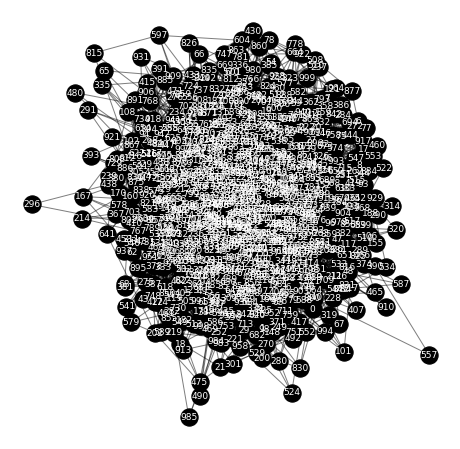

In [213]:
plot_grafo(RE[0])

In [214]:
RE_medidas = []

In [215]:
RE_nodes = number_nodes(RE)
RE_medidas.append(RE_nodes)

In [216]:
RE_edges = number_edges(RE)
RE_medidas.append(RE_edges)

In [217]:
RE_average_degree = average_degre(RE)
RE_medidas.append(RE_average_degree)

In [218]:
RE_second_moment = second_moment(RE)
RE_medidas.append(RE_second_moment)

In [219]:
RE_average_shortest_path_length= average_shortest_path_length(RE)
RE_medidas.append(RE_average_shortest_path_length)

In [220]:
RE_transitivity = transitivity(RE)
RE_medidas.append(RE_transitivity)

In [221]:
RE_average_clustering = average_clustering(RE)
RE_medidas.append(RE_average_clustering)

In [222]:
RE_degree_pearson_correlation_coefficient = degree_pearson_correlation_coefficient(RE)
RE_medidas.append(RE_degree_pearson_correlation_coefficient)

In [233]:
RW = []
for i in range(30):# Gerando rede aleatória Erdos-Renyi com os seguintes parametros
    N = 1000# numero de nós
    av_degree = 10 # grau médio
    k = int(av_degree)# Cada nó está conectado aos k vizinhos mais próximos na topologia em anel
    p = 0.1 #probabilidade de religação
    GWS = nx.watts_strogatz_graph(N, k, p, seed=None)
    RW.append(GWS)

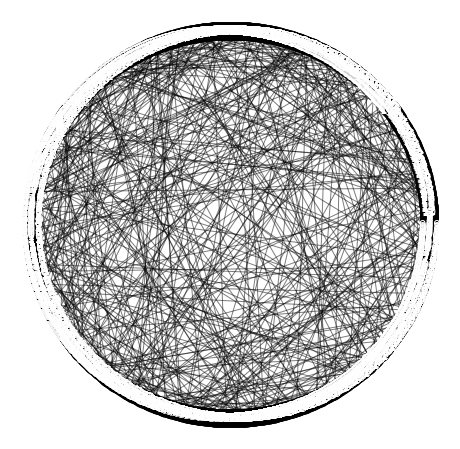

In [234]:
plot_grafo_anel(RW[0])

In [235]:
RW_medidas = []

In [236]:
RW_nodes = number_nodes(RW)
RW_medidas.append(RW_nodes)

In [237]:
RW_edges = number_edges(RW)
RW_medidas.append(RW_edges)

In [238]:
RW_average_degree = average_degre(RW)
RW_medidas.append(RW_average_degree)

In [239]:
RW_second_moment = second_moment(RW)
RW_medidas.append(RW_second_moment)

In [240]:
RW_average_shortest_path_length= average_shortest_path_length(RW)
RW_medidas.append(RW_average_shortest_path_length)

In [241]:
RW_transitivity = transitivity(RW)
RW_medidas.append(RW_transitivity)

In [242]:
RW_average_clustering = average_clustering(RE)
RW_medidas.append(RW_average_clustering)

In [243]:
RW_degree_pearson_correlation_coefficient = degree_pearson_correlation_coefficient(RW)
RW_medidas.append(RW_degree_pearson_correlation_coefficient)

In [244]:
# Gerando rede aleatória  Barabási-Albert  com os seguintes parametros
RA = []

for i in range(30):
    N = 1000 # numero de nos
    av_degree = 10#Grau médio
    m = int(av_degree/2)#probabilidade do grau
    GBA = nx.barabasi_albert_graph(N, m)
    RA.append(GBA)

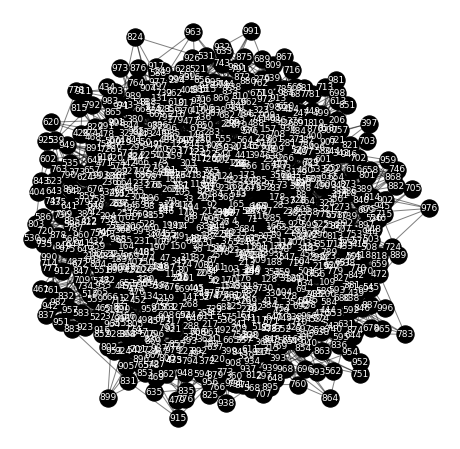

In [245]:
plot_grafo(RA[0])

In [246]:
RA_medidas = []

In [247]:
RA_nodes = number_nodes(RA)
RA_medidas.append(RA_nodes)

In [248]:
RA_edges = number_edges(RA)
RA_medidas.append(RA_edges)

In [249]:
RA_average_degree = average_degre(RA)
RA_medidas.append(RA_average_degree)

In [250]:
RA_second_moment = second_moment(RA)
RA_medidas.append(RA_second_moment)

In [251]:
RA_average_shortest_path_length= average_shortest_path_length(RA)
RA_medidas.append(RA_average_shortest_path_length)

In [252]:
RA_transitivity = transitivity(RA)
RA_medidas.append(RA_transitivity)

In [253]:
RA_average_clustering = average_clustering(RE)
RA_medidas.append(RA_average_clustering)

In [254]:
RA_degree_pearson_correlation_coefficient = degree_pearson_correlation_coefficient(RA)
RA_medidas.append(RA_degree_pearson_correlation_coefficient)

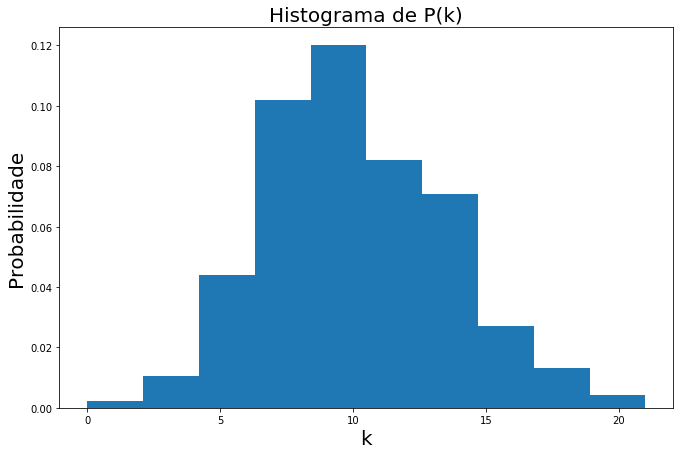

In [180]:
RE_k,RE_pk,RE_grau = degree_distribution(RE[0])
plog_histograma(RE_grau)

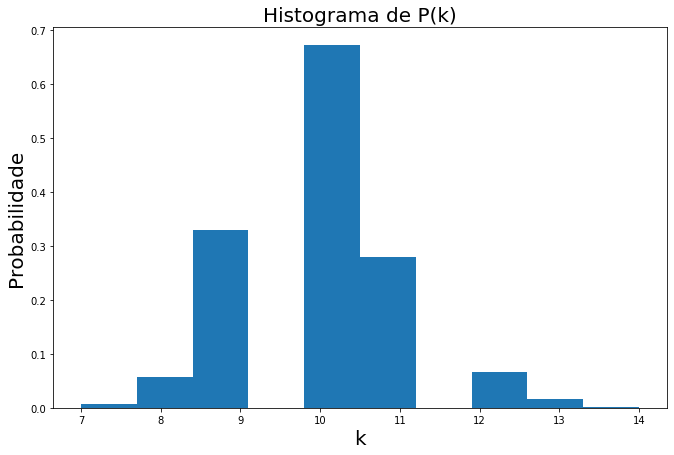

In [181]:
RW_k,RW_pk,RW_grau = degree_distribution(RW[0])
plog_histograma(RW_grau)

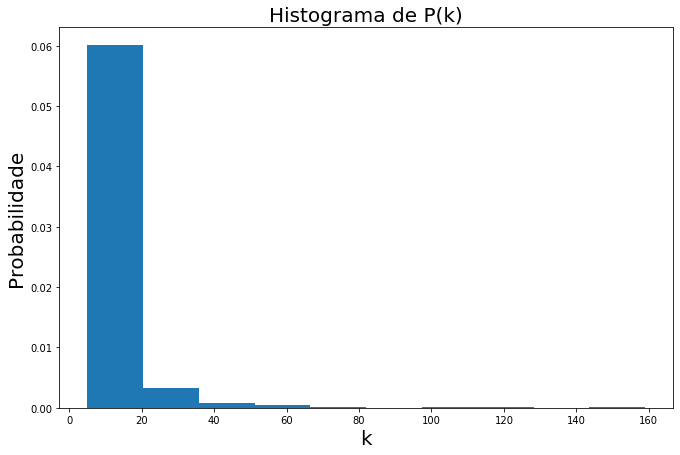

In [182]:
RA_k,RA_pk,RA_grau = degree_distribution(RA[0])
plog_histograma(RA_grau)

In [256]:
RE_medidas = means(RE_medidas)

TypeError: object of type 'numpy.float64' has no len()

In [258]:
RW_medidas = means(RW_medidas)


In [259]:
RA_medidas = means(RA_medidas)

In [270]:

data = [RE_medidas,RW_medidas,RA_medidas]
colunas = ["Number o nodes","Number o egdes","Average degree","Second moment of degree dist","Average Shortest path","Average clustering coefficient","Transitivity","Assortativity coefficient"]
Redes_Random = pd.DataFrame(data, columns=colunas)

In [271]:
Redes_Random # 0 - redes Erdös-Rényi
             # 1 - WattsStrogatz
             # 2 - Barabási-Albert

,Number o nodes,Number o egdes,Average degree,Second moment of degree dist,Average Shortest path,Average clustering coefficient,Transitivity,Assortativity coefficient
0,1000.0,4983.5,9.967,9.852300,3.151864,0.010175,0.010209,-0.001196
1,1000.0,5000.0,10.000,0.950267,4.437662,0.482892,0.010209,-0.011006
2,1000.0,4975.0,9.950,104.187167,2.979439,0.029654,0.010209,-0.057274
